In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/security_incidents_clean.csv")

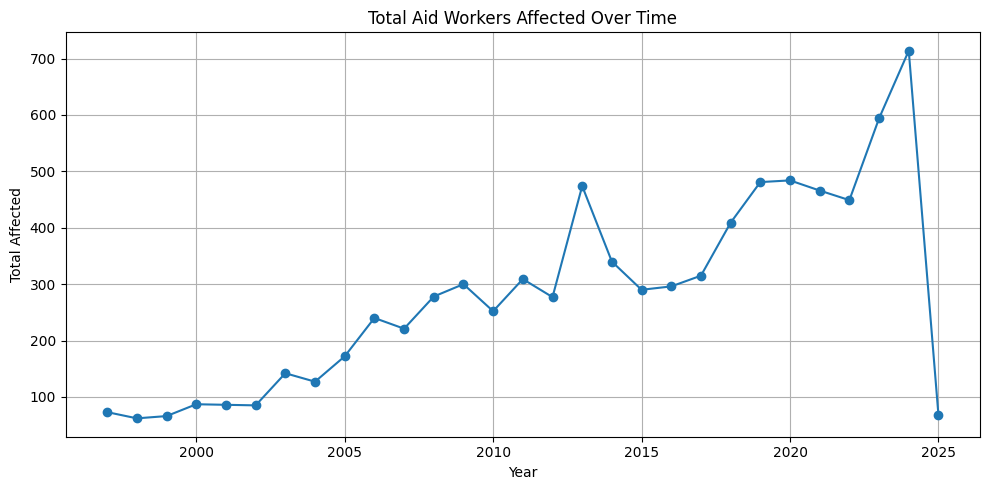

In [8]:
import matplotlib.pyplot as plt

# Group by year and sum total affected
yearly_totals = df.groupby('Year')['Total affected'].sum().reset_index()

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_totals['Year'], yearly_totals['Total affected'], marker='o')
plt.title('Total Aid Workers Affected Over Time')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Group by Year and Country, summing the total affected
grouped = df.groupby(['Year', 'Country'])['Total affected'].sum().reset_index()

# Sort within each year and get top 3 countries
top3_per_year = grouped.sort_values(['Year', 'Total affected'], ascending=[True, False]) \
                       .groupby('Year').head(3)

# Create list of tuples (Country, Total Affected) for each year
top3_list = top3_per_year.groupby('Year').apply(
    lambda x: list(zip(x['Country'], x['Total affected']))
).reset_index(name='Top 3 Countries with Counts')

# Display result
top3_list


,Year,Top 3 Countries with Counts
0,1997,"[(Chechnya, 15), (Somalia, 15), (DR Congo, 10)]"
1,1998,"[(Somalia, 18), (Kosovo, 7), (Sudan, 7)]"
2,1999,"[(Angola, 13), (Somalia, 10), (Sudan, 9)]"
3,2000,"[(Somalia, 16), (Sudan, 15), (Indonesia, 10)]"
4,2001,"[(Somalia, 19), (Burundi, 15), (Tajikistan, 15)]"
5,2002,"[(Angola, 14), (Chechnya, 11), (Occupied Pales..."
6,2003,"[(Iraq, 49), (Afghanistan, 22), (Sudan, 11)]"
7,2004,"[(Afghanistan, 40), (Iraq, 32), (Sudan, 23)]"
8,2005,"[(Sudan, 73), (Afghanistan, 35), (Somalia, 12)]"
9,2006,"[(Sudan, 87), (Afghanistan, 55), (Sri Lanka, 25)]"


In [12]:
top3_list.to_csv("test.csv", index=False)

In [13]:
!pip install pycountry-convert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.6/343.6 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 9.1 MB/s eta 0:00:0000:0100:01
  Using cached tomli-2.2.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: pluggy
    Found existing installation: pluggy 1.0.0
    Uninstalling pluggy-1.0.0:
      Successfully uninstalled pluggy-1.0.0


In [14]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

# Apply function to create 'Grou' column
df['Group'] = df['Country'].apply(get_continent)


In [15]:
df.head()

,Incident ID,Year,Month,Country Code,Country,Region,District,City,UN,INGO,...,Means of attack,Attack context,Location,Motive,Actor type,Actor name,Details,Verified,Source,Group
0,1,1997,1,KH,Cambodia,Banteay Meanchey,Unknown,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,1 ICRC national staff killed while working in ...,Archived,Archived,Asia
1,2,1997,1,RW,Rwanda,Northern,Musanze,Ruhengeri,0,4,...,Shooting,Raid,Office/compound,Unknown,Unknown,Unknown,"3 INGO international (Spanish) staff killed, 1...",Archived,Archived,Africa
2,3,1997,2,TJ,Tajikistan,Unknown,Unknown,Unknown,4,0,...,Kidnapping,Unknown,Unknown,Unknown,Unknown,Unknown,"3 UN national staff, 1 UN international (Niger...",Archived,Archived,Asia
3,4,1997,2,SO,Somalia,Lower Juba,Kismayo,Kismayo,0,1,...,Unknown,Unknown,Unknown,Political,Non-state armed group: Regional,Al-Itihaad al-Islamiya,1 INGO international staff killed by Al ittiha...,Archived,Archived,Africa
4,5,1997,2,RW,Rwanda,Kigali,Kigali,Kigali,1,0,...,Shooting,Individual attack,Unknown,Political,Unknown,Unknown,1 UN national staff shot and killed in Kigali ...,Archived,Archived,Africa


In [17]:
df['Group'].unique()

array(['Asia', 'Africa', 'Unknown', 'South America', 'Oceania',
       'North America', 'Europe'], dtype=object)

In [19]:
# Filter rows where region group is 'Unknown'
unknown_group_rows = df[df['Group'] == 'Unknown']

# Display the result
print(unknown_group_rows)


      Incident ID  Year  Month Country Code                           Country  \
5               7  1997      5           CD                          DR Congo   
14             16  1997      7      Unknown                          Chechnya   
15             17  1997      7      Unknown                          Chechnya   
16             18  1997      7      Unknown                          Chechnya   
20             21  1997      8      Unknown                          Chechnya   
...           ...   ...    ...          ...                               ...   
4301         4447  2025      1           PS  Occupied Palestinian Territories   
4303         4473  2025      1           CD                          DR Congo   
4310         4467  2025      2           CD                          DR Congo   
4312         4482  2025      2           PS  Occupied Palestinian Territories   
4320         4480  2025      2           CD                          DR Congo   

          Region     Distri

In [20]:
unknown_countries = unknown_group_rows['Country'].unique()
print(unknown_countries)


['DR Congo' 'Chechnya' 'Kosovo' 'Occupied Palestinian Territories'
 'Kashmir' "Cote D'Ivoire" 'Libyan Arab Jamahiriya' 'Western Sahara']


In [21]:
custom_region_map = {
    'DR Congo': 'Africa',
    'Chechnya': 'Europe',  # Part of Russia (Caucasus region)
    'Kosovo': 'Europe',
    'Occupied Palestinian Territories': 'Middle East',
    'Kashmir': 'Asia',  # Disputed territory between India and Pakistan
    "Cote D'Ivoire": 'Africa',  # Also known as Ivory Coast
    'Libyan Arab Jamahiriya': 'Africa',  # Former name of Libya
    'Western Sahara': 'Africa'
}


In [23]:
df['Group'] = df.apply(
    lambda row: custom_region_map[row['Country']] if row['Country'] in custom_region_map else row['Group'],
    axis=1
)


In [24]:
df['Group'].unique()

array(['Asia', 'Africa', 'Europe', 'South America', 'Oceania',
       'Middle East', 'North America'], dtype=object)

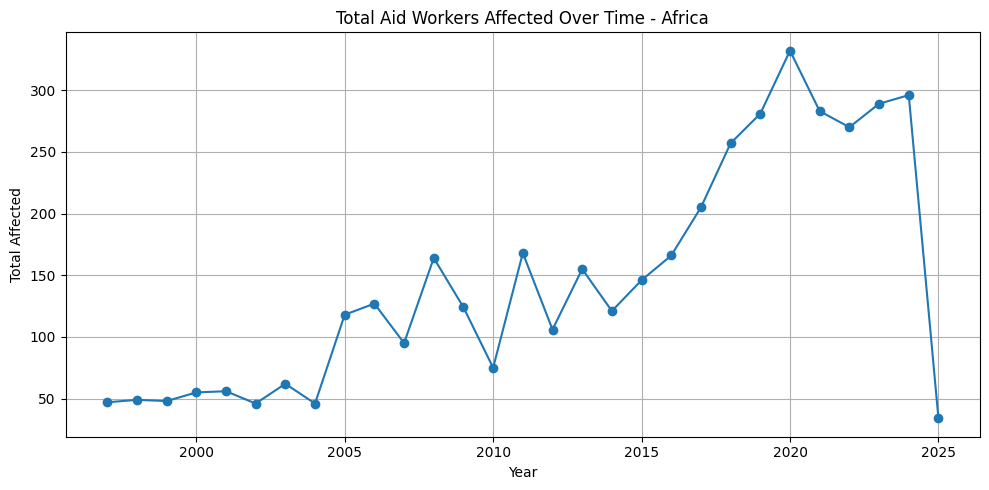

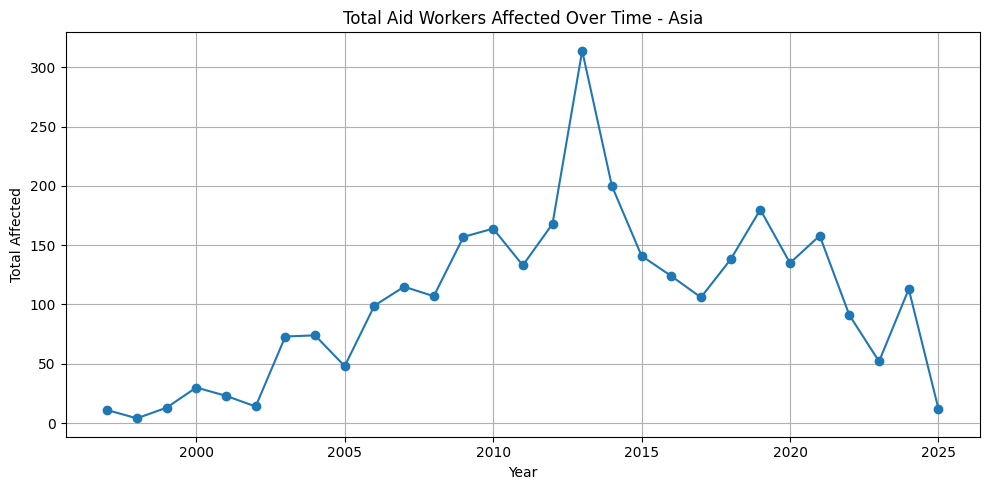

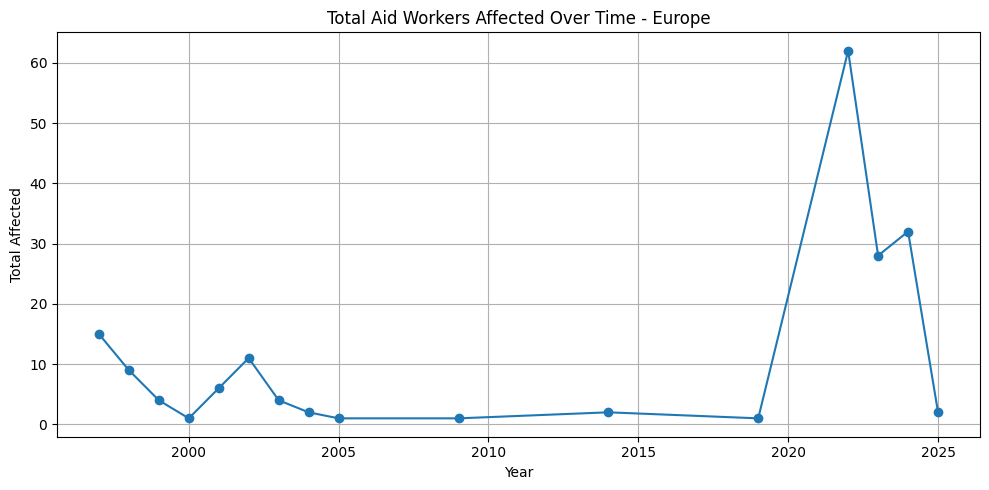

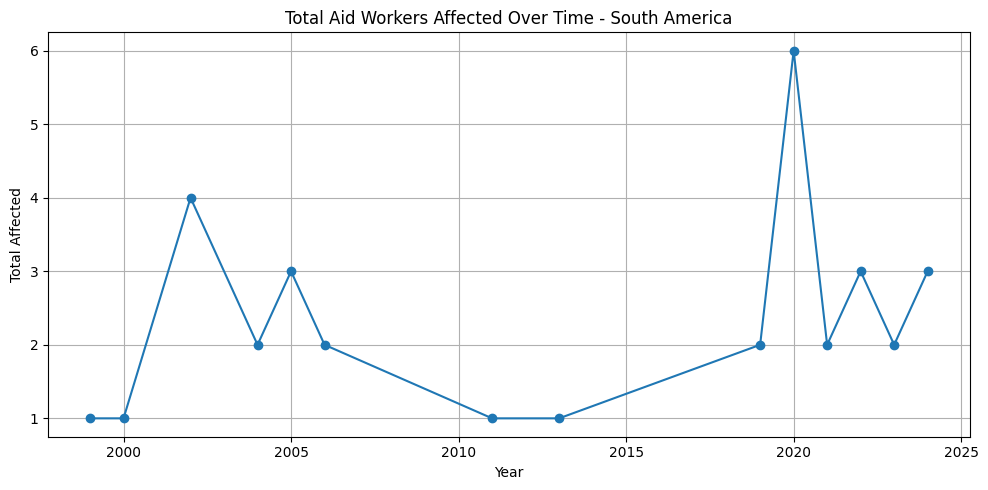

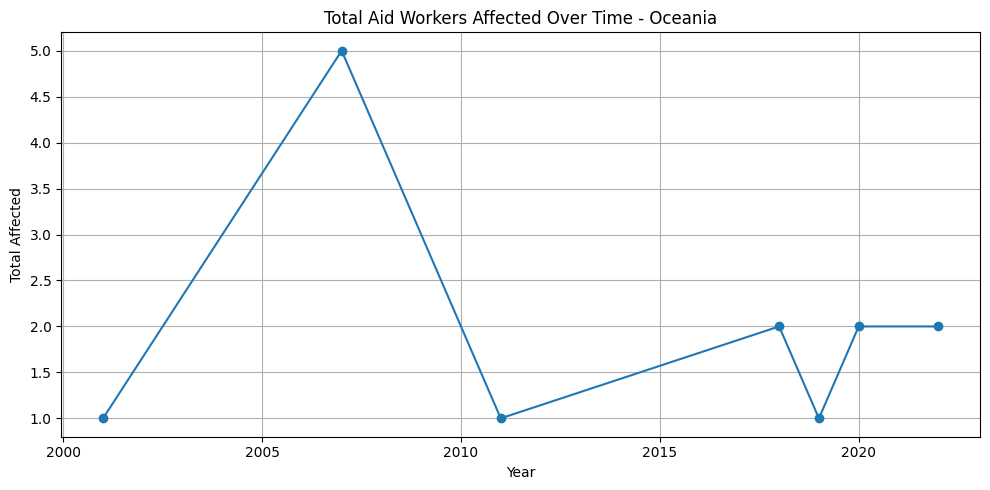

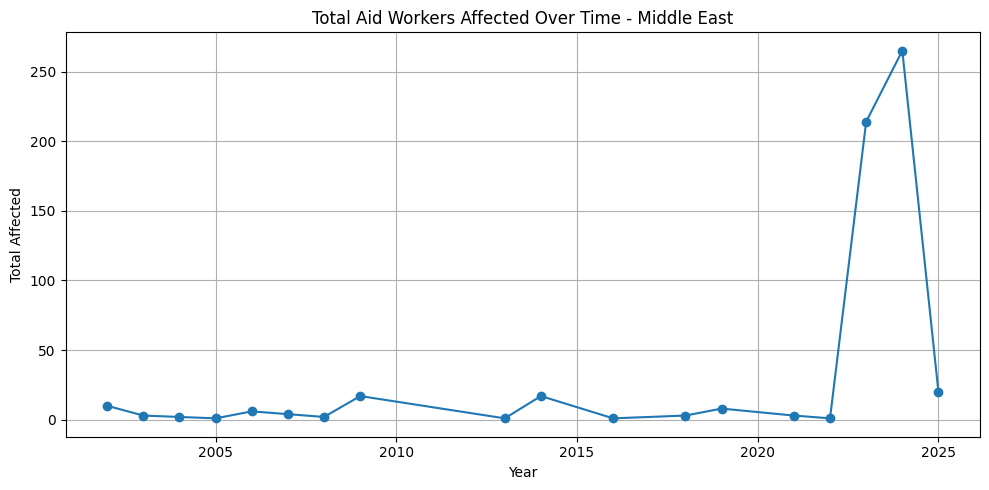

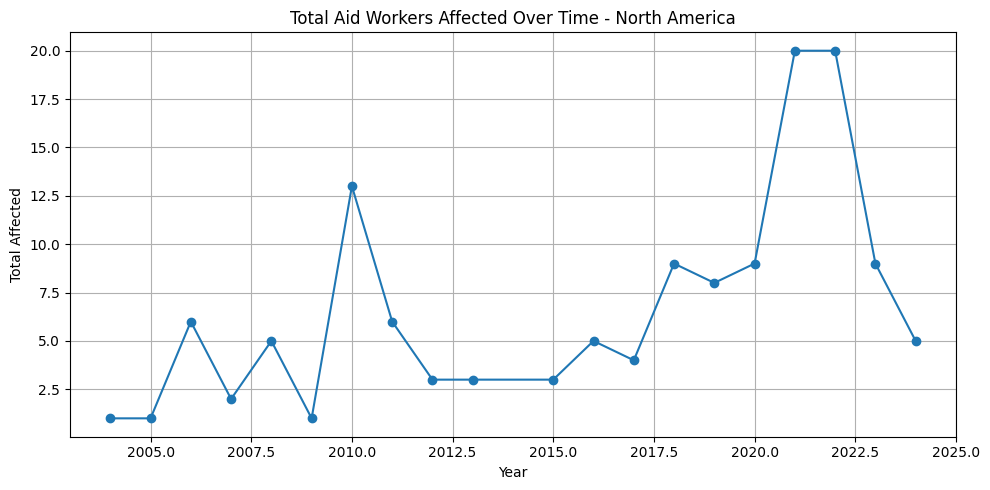

In [26]:
# Group by Year and Region (Grou), summing total affected
region_year = df.groupby(['Year', 'Group'])['Total affected'].sum().reset_index()

# Get list of unique regions
regions = region_year['Group'].unique()

# Create a separate plot for each region
for region in regions:
    region_data = region_year[region_year['Group'] == region]
    
    plt.figure(figsize=(10, 5))
    plt.plot(region_data['Year'], region_data['Total affected'], marker='o')
    plt.title(f'Total Aid Workers Affected Over Time - {region}')
    plt.xlabel('Year')
    plt.ylabel('Total Affected')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [27]:
df.to_csv("../data/processed/security_incidents_clean.csv", index=False)